<a href="https://colab.research.google.com/github/bekkahmoore/Numerical-Methods/blob/main/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 5**#
##Sanjiv T, Kushal K, Aayush K, Bekkah M
###Numerical Methods--Dr. Jacob

#Revising Gauss-Jordan Elimination mehthod
This method helps us to solve the linear equations. 
This is in the form as shown below:

\begin{align}
a_{1,1} x_1 +&amp;\dots a_{1,n} x_n = y_1\\
&amp;\vdots\\
a_{n,1}x_1+&amp;\dots a_{n,n} x_n = y_n
\end{align}


We will solve the equation by putting the above equation in the form shown as below:


\begin{array}{ccc|c}
a_{1,1} &amp; \dots &amp; a_{1,n} &amp; y_1\\
\vdots&amp;\ddots&amp;\vdots&amp;\vdots\\
a_{n,1} &amp;\dots&amp; a_{n,n}&amp;y_n
\end{array}

This is called augmented matrix form. And we will futher solve this problem.

We will need to use the Gausse-Jordan Elimination method that we constructed in Project 4, so we will copy that code here:

In [ ]:
import math
import numpy as np
import scipy.linalg as la

def adding_row(M,select_Row, modifierRow, V):
  new_Row = M[select_Row,:]+V*M[modifierRow,:]
  newMatrix = []
  for i in range(len(M)):
    if i != select_Row:
      newMatrix.append(M[i,:])
    else:
      newMatrix.append(new_Row)
  return np.array(newMatrix)


  def Multiplying(M,row,constant):
    newMatrix =[]
  for i in range(len(M)):
    if i != row:
      newMatrix.append(M[i,:])
    else:
      newMatrix.append(1/M[row,constant]*M[row,:])
  return np.array(newMatrix)

  def gaussJordan(M):
    newMatrix = M
    for pivot in range(len(M)):
      newMatrix = Multiplying(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = adding_row(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(M)):
      newMatrix = adding_row(newMatrix,column,pivot,-newMatrix[column,pivot])
    return newMatrix

 

#***Direct Method***


Direct method solves the  n+1 linear simultaneous equation to find the values of the function, estimating the missing data points in between.
The direct method of interpolation is based on:

Given n +1 data points, 
fit a polynomial of order n as 
  y = a + a x + ............... + a x 0 1 

where a a an , ,......., 0 1 are n +1 real constants. Since n +1 values of y are given at n +1 values of x , one can write n +1 equations.

Then, the n +1 constants, a a an , ,........., 0 1 can be found by solving the n +1 simultaneous linear equations.

In [ ]:
def createRow(input,output,Polynomial):
  array = []
  for i in range(Polynomial+1):
    array.append(input**i)
  array.append(output)
  return array

In [ ]:
createRow(2,3,5)

NameError: ignored

Here we created the row.

In [ ]:
data =[[1,2],[1,1],[1,3],[2,1]]

In [ ]:
import numpy as np
def AugmentedMatrix(Array):
  matrix = []
  order = len(Array)-1
  for i in range(len(Array)):
    matrix.append(createRow(Array[i][0],Array[i][1],order))
  return np.array(matrix)


In [ ]:
AugmentedMatrix(data)

array([[1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 3],
       [1, 2, 4, 8, 1]])

We are about the solve the augmented matrix.

In [ ]:
(AugmentedMatrix(data))[:,-1]

string = ''
for i in range(len((AugmentedMatrix(data))[:,-1])):
  coef = (AugmentedMatrix(data))[i,-1]
  string = string + '+{}'.format(coef) + r'x^{}'.format(i)

string

'+2x^0+1x^1+3x^2+1x^3'

In [ ]:
def directSpline(Array, variable):
  coefficients = (AugmentedMatrix(Array))[:,-1]
  value = 0
  for i in range(len(coefficients)):
    value = value + coefficients[i]*variable**i
  return value


In [ ]:
directSpline(data,2)

24

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def equation(x):
  return 1/(1-x)

x = np.arange( 0,10,.1)
plt.scatter(np.array(data)[:,0],np.array(data)[:,1])
plt.plot(x,directSpline(data,x))
#plt.plot(x, equation(x))
plt.title('Graph of Direct Spline')


plt.show()

NameError: ignored

#***Linear Spline***

In numerical methods and analysis, spline interpolation can be defines as a form of interpolation where the interpolant is a special type of piecewise polynomial called a spline.

Our function that we have been utilizing this whole time is $\frac{1}{1-x}$. We will examine this function on the interval [-3,1) since that's the most interesting part. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


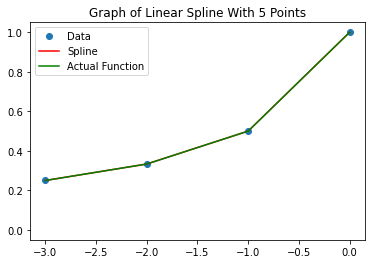

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def function(x):
  return 1/(1-x)

x = np.linspace(-3, 1, num=5, endpoint=True)
y = function(x)
LinearInterpolate = interp1d(x,y)
Linear2 = interp1d(x, y, kind='linear')

xnew = np.linspace(-3, 1, num=5, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o',xnew,LinearInterpolate(xnew),"r",x,function(x),"g")
plt.plot(range(0,1))
plt.title("Graph of Linear Spline With 5 Points")
plt.legend(['Data', 'Spline','Actual Function'], loc='best')
plt.show()

The actual function and the spline are directly on top of each other, so I know there is something wrong with my code here. I just can't seem to figure out what. I used the scipy interpolate built in function "interp1d". This seemed to be the simplest way I could figure out how to interpolate. 

We will now do this again, but this time with 20 evenly spaced points.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


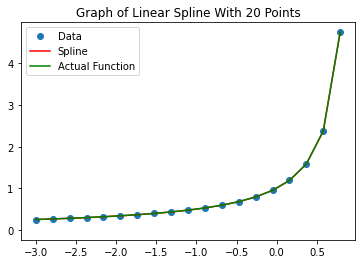

In [ ]:
x = np.linspace(-3, 1, num=20, endpoint=True)
y = function(x)
LinearInterpolate = interp1d(x, y)
Linear2 = interp1d(x, y, kind='linear')

xnew = np.linspace(-3, 1, num=20, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o',xnew,LinearInterpolate(xnew),"r",x, function(x),"g")
plt.plot(range(0,1))
plt.title("Graph of Linear Spline With 20 Points")
plt.legend(['Data','Spline', 'Actual Function'], loc='best')
plt.show()

#Limitations of Spline Function:
In our project, we can see that the spline function is forced to fit all the data which gives inconsistency in the graph. There might be data that includes error in between the mid points of the data but we are not pretty sure aboout that. 


We can see that the more points we use to approximate, the more smooth and accurate the spline is. Here, the spline and the actual function line up perfectly, but that makes sense because using more points is what allows us to get closer to the actual function. 

#Choosing Points:
We have choosen the data points in the graph as so that the graph data looks consistent. We could have taken the data out of the window but the graph would be more complex to understand. So, interpolation gives us good approximations but there are limitations that we need to be aware of and solve the problem accordingly.